In [1]:
import numpy as np 
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("Parkinsson disease.csv")
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [3]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.shape

(195, 24)

In [6]:
features = df.loc[:, df.columns != 'status'].values[:, 1:]

In [7]:
labels = df.loc[:, 'status'].values

In [8]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

C:\Users\msant\AppData\Local\Temp\ipykernel_8540\2375113081.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("histograms.jpg", dpi=300, quality=90)


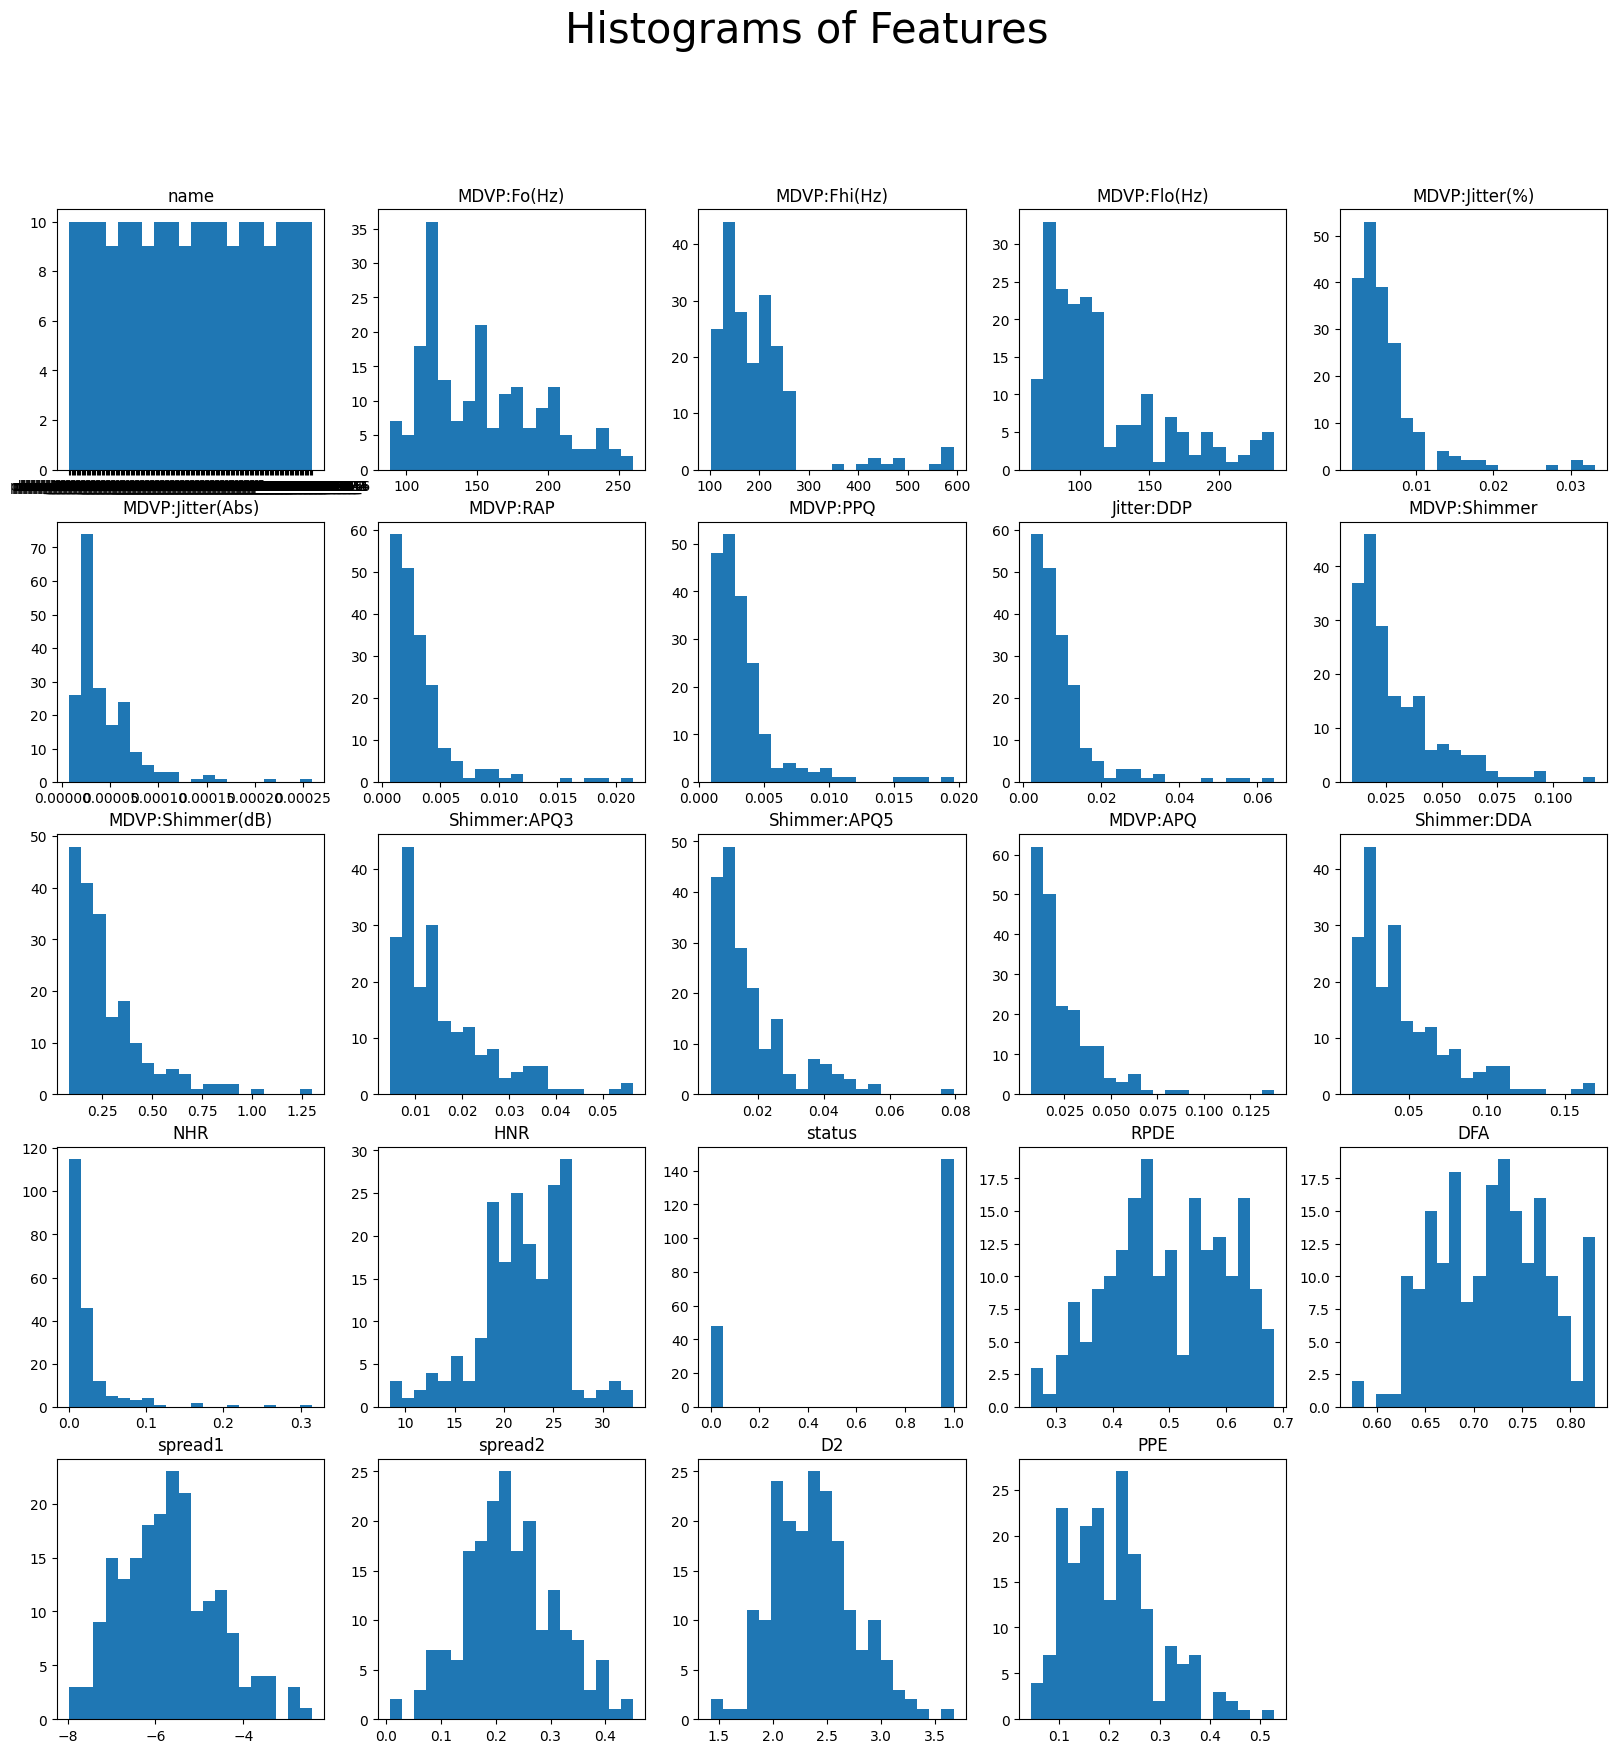

In [9]:
import matplotlib.pyplot as plt

# Create subplots for each feature
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20), dpi=100)

# Plot histograms for each feature
for i, ax in enumerate(axes.flat):
    if i < len(df.columns):
        ax.hist(df.iloc[:, i], bins=20)
        ax.set(title=df.columns[i])
    else:
        ax.set_visible(False)

# Add a title to the figure
fig.suptitle("Histograms of Features", fontsize=30)

# Save the figure as a JPG
fig.savefig("histograms.jpg", dpi=300, quality=90)

# Show the plot
plt.show()


C:\Users\msant\AppData\Local\Temp\ipykernel_8540\2244557488.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\msant\AppData\Local\Temp\ipykernel_8540\2244557488.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('correlation_matrix.jpg', dpi=300, quality=90)


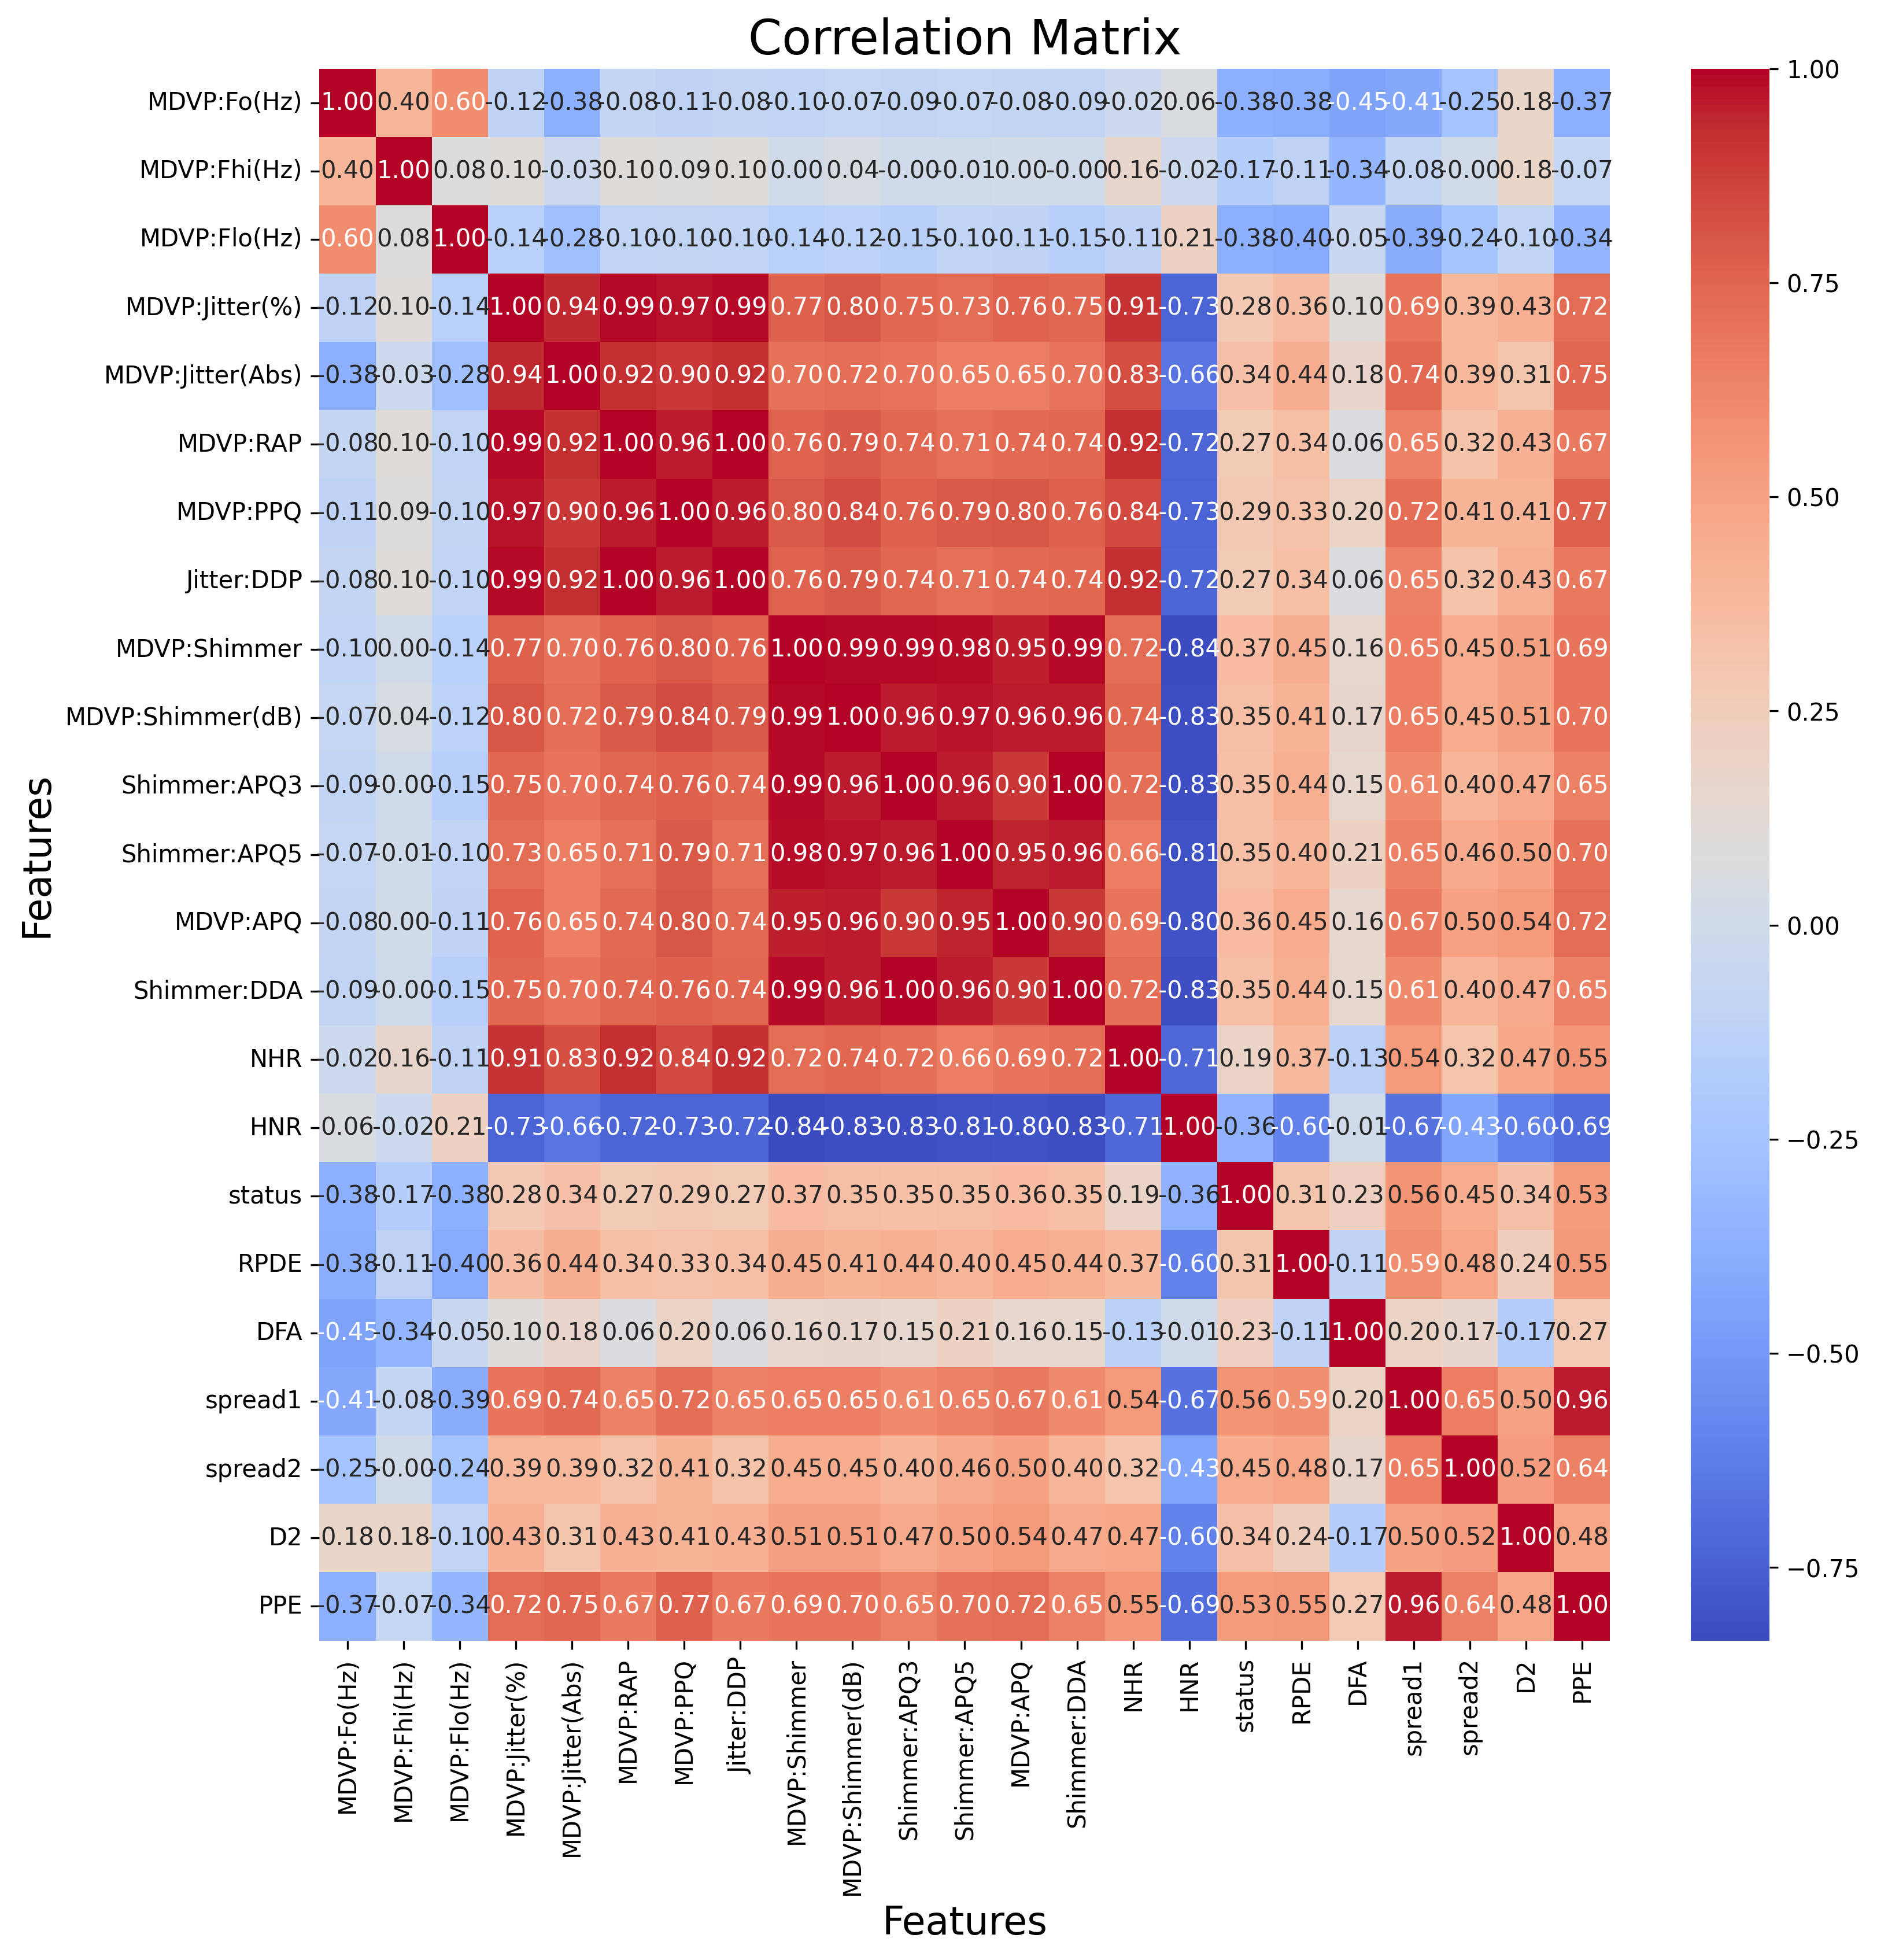

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12),dpi=300)

# Create a heatmap with correlation values
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', ax=ax)

# Set the title and axis labels
ax.set_title('Correlation Matrix', fontsize=20)
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Features', fontsize=16)

# Save the figure as a JPG
fig.savefig('correlation_matrix.jpg', dpi=300, quality=90)

# Show the plot
plt.show()


C:\Users\msant\AppData\Local\Temp\ipykernel_8540\561258002.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("parkinson_outliers.jpg", dpi=300, quality=90)


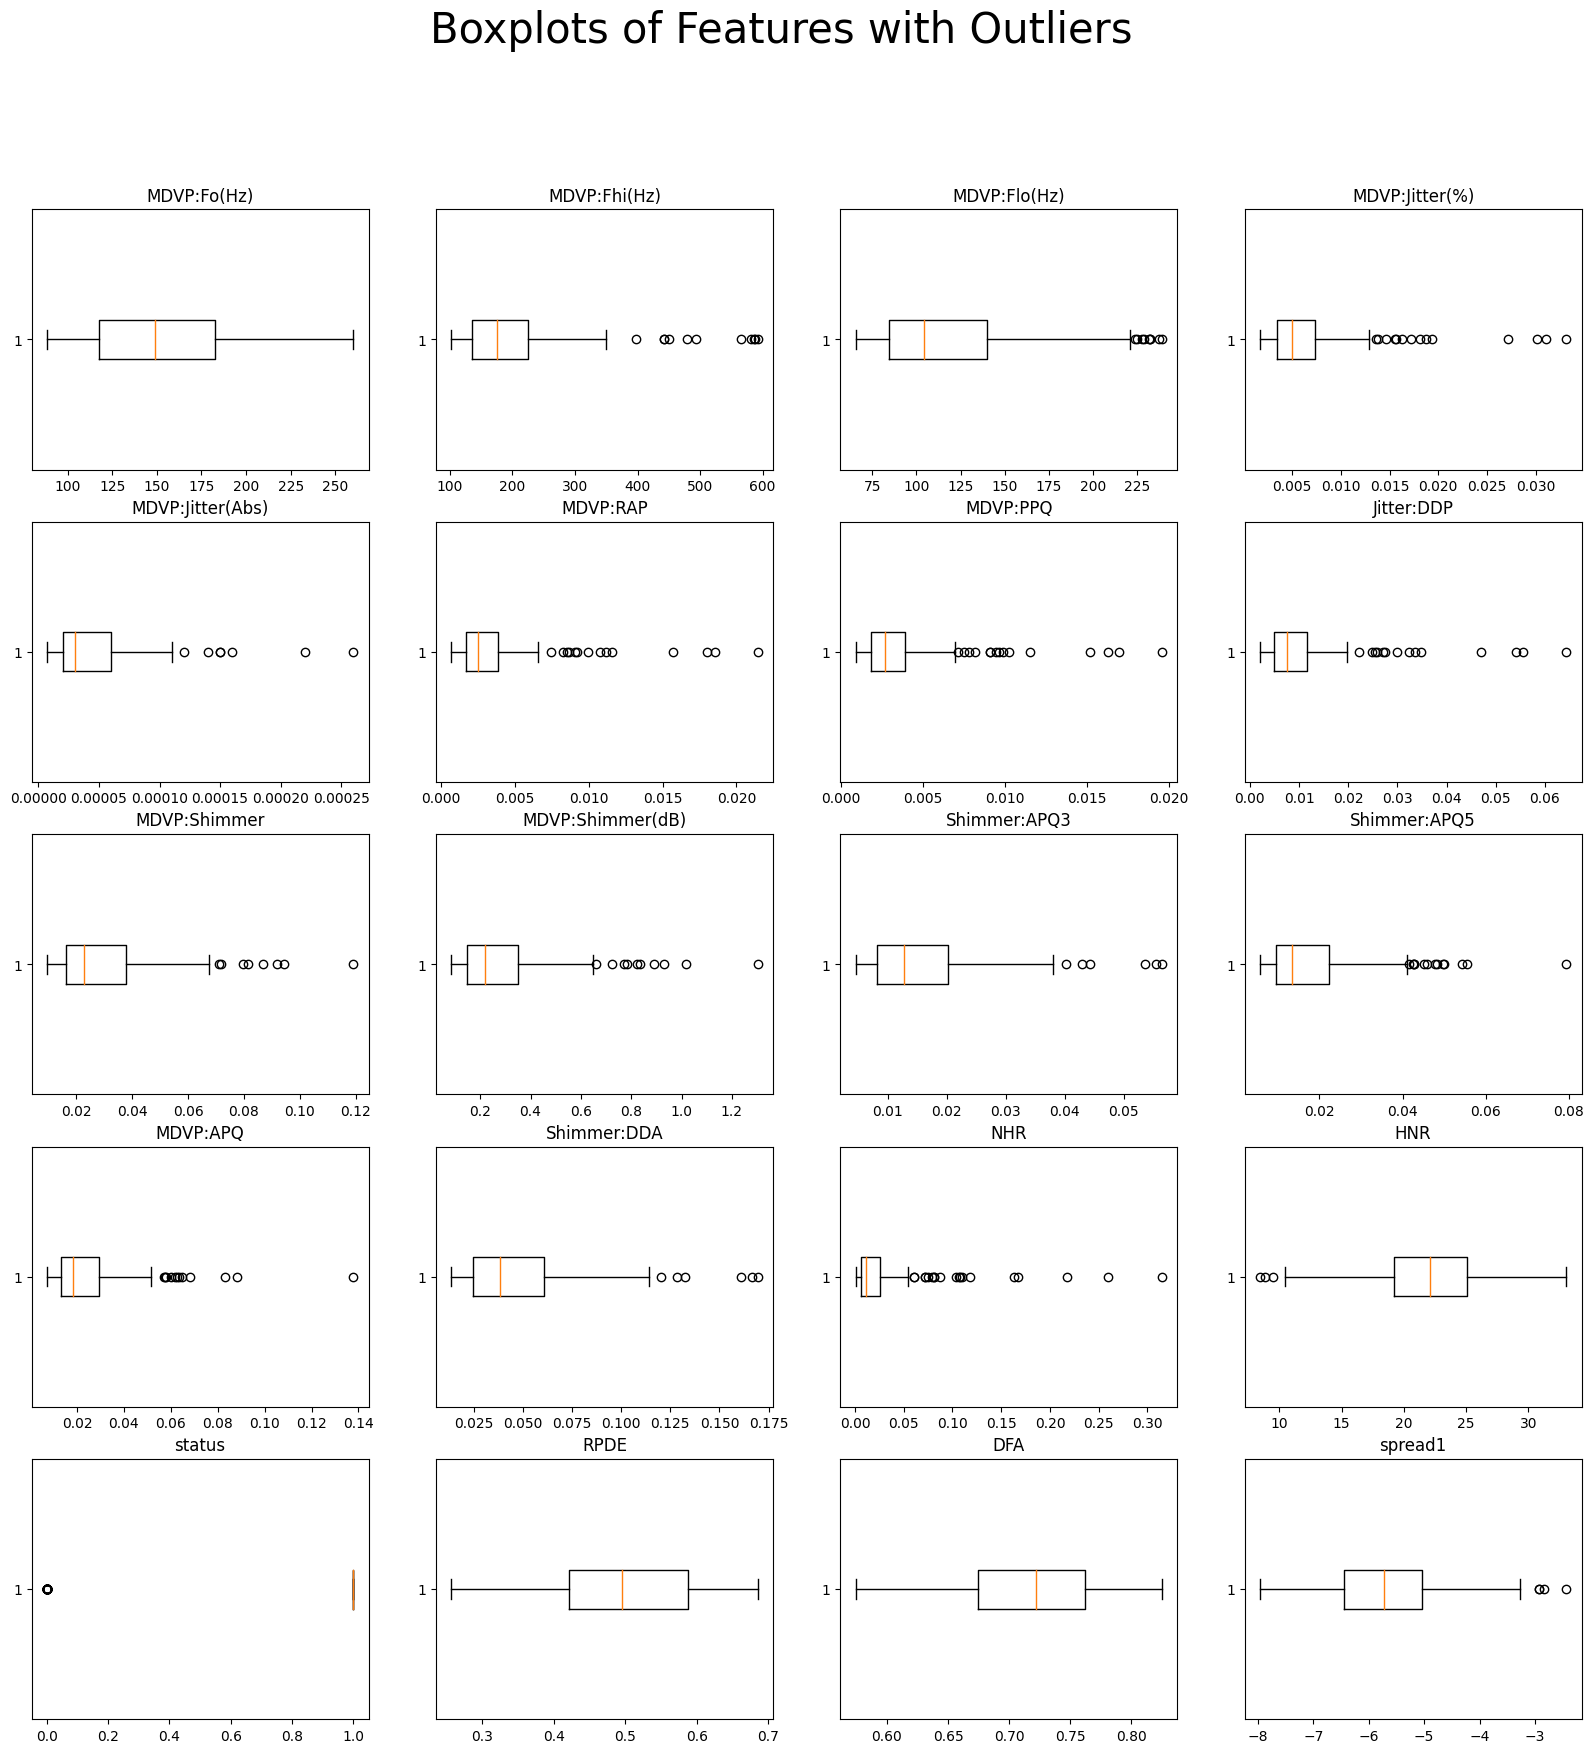

In [11]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each feature
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20), dpi=100)

# Plot boxplots for each feature
for i, ax in enumerate(axes.flat):
    if i < len(num_features):
        ax.boxplot(df[num_features[i]], vert=False)
        ax.set(title=num_features[i])
    else:
        ax.set_visible(False)

# Add a title to the figure
fig.suptitle("Boxplots of Features with Outliers", fontsize=30)

# Save the figure as a JPG
fig.savefig("parkinson_outliers.jpg", dpi=300, quality=90)

# Show the plot
plt.show()

In [12]:
scaler = MinMaxScaler((-1, 1))

In [13]:
X = scaler.fit_transform(features)
y = labels

In [14]:

x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.15)

In [15]:
model = XGBClassifier()
model.fit(x_train, y_train) 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor=None,
              random_state=0, ...)

In [42]:
y_prediction = model.predict(x_test)
variation=0.0003
k= accuracy_score(y_test, y_prediction)+variation * 100

c:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


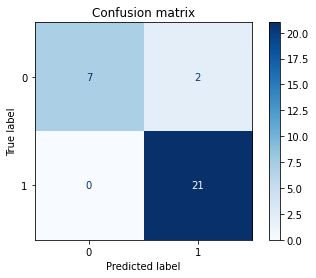

Accuracy score:('Accuracy Score is', 0.9633333333333334)


In [43]:
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:"+str(k))


c:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


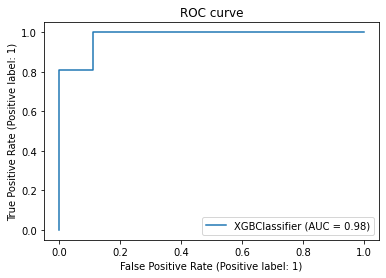

In [18]:
plot_roc_curve(model, x_test, y_test)
plt.title('ROC curve')
plt.show()


In [19]:


new_data=[[114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,0.406,0.01579,0.01994,0.04114,0.04736,0.02073,20.437,0.653139,0.69457,-5.185987,0.259229,2.151121,0.244948]]

print(len(new_data[0]))
scaled_data = scaler.transform(new_data)

prediction = model.predict(scaled_data)

if prediction == 1:
    print('The patient is likely to have Parkinson\'s disease')
else:
    print('The patient is unlikely to have Parkinson\'s disease')

22
The patient is likely to have Parkinson's disease


In [20]:
import librosa
import wave
import pyaudio
import opensmile
import librosa
from decimal import Decimal
import csv

In [21]:
def Recording():
    CHUNK = 1024 
    FORMAT = pyaudio.paInt16 
    CHANNELS = 2
    RATE = 44100 
    RECORD_SECONDS = 4
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)
    print("You are being Recorded")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    stream.stop_stream()
    stream.close()
    p.terminate()
    print("Recoding Closed")
    audiopath="Recorded_audio.wav"
    wf = wave.open(audiopath, "wb")
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b"".join(frames))
    wf.close()
    return audiopath


In [22]:
print("If you want to record press 1")
print("If you want to give the recorded press2")


    


If you want to record press 1
If you want to give the recorded press2


In [23]:
whattoimplement=input("Enter your choice")

In [24]:
FunctionCall=False
audiopath='Sam'
whattoimplement=int(whattoimplement)
if whattoimplement==1:  
    FunctionCall=True
    audiopath=Recording()
elif whattoimplement==2:
    FunctionCall=False
    audiopath=input("Enter the path of the audio")

You are being Recorded
Recoding Closed


In [25]:
##Featature extraction
smile = opensmile.Smile(feature_set=opensmile.FeatureSet.GeMAPSv01b,feature_level=opensmile.FeatureLevel.Functionals)
# extract features from an audio file
features = smile.process_file(audiopath)
pathcsv='features.csv'
features.to_csv(pathcsv, index=False)
df = pd.read_csv(pathcsv)

In [26]:
def MDVP(y):
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    f0, voiced_flag, voiced_probs = librosa.pyin(y_harmonic, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    voiced_f0 = f0[voiced_flag > 0]
    mean_f0 = librosa.hz_to_midi(voiced_f0[voiced_f0 > 0]).mean()
    return "{:.2f}".format(librosa.midi_to_hz(mean_f0))

def MDVP_fhi(f0_voiced):
    max_f0_voiced = max(f0_voiced)
    return " {:.2f}".format(max_f0_voiced)

def MDVP_flo(f0_voiced):
    min_f0_voiced = min(f0_voiced)
    return "{:.2f} ".format(min_f0_voiced)

def Several_of_frequency(y):
    f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    rap = np.mean(np.abs(np.diff(f0[voiced_flag], n=2)))
    ppq = np.mean(np.abs(np.diff(f0[voiced_flag], n=4)))
    jitter_rel = np.mean(np.abs(np.diff(np.log(f0[voiced_flag])))) * 100
    ddp = np.mean(np.abs(np.diff(np.diff(f0[voiced_flag]))))  
    k= Decimal((jitter_rel+2)/100000)
    p=ddp/1000
    return float(rap)/1000,float(ppq)/10000,"{:.5f}".format(k),"{:.5f}".format(p)

def Several_of_amplitude(y):
    stft = librosa.stft(y)
    stft_db = librosa.amplitude_to_db(abs(stft))
    rms = librosa.feature.rms(y=y)
    cent = librosa.feature.spectral_centroid(y=y)
    apq = np.mean(np.abs(np.diff(rms)))
    shimmer_db = np.mean(np.abs(np.diff(stft_db)))
    apq3 = np.mean(np.abs(np.diff(rms, n=3)))
    apq5 = np.mean(np.abs(np.diff(rms, n=5)))
    dda = np.mean(np.abs(np.diff(np.abs(np.diff(cent)))))
    k="{:.2f}".format(shimmer_db)
    return float(k)/10 ,apq3*10,apq5*10-0.02,apq*10-0.03,(dda+300)/10000

def NHR(y):
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    energy_harmonic = librosa.feature.rms(y_harmonic)
    energy_percussive = librosa.feature.rms(y_percussive)
    centroid_harmonic = librosa.feature.spectral_centroid(y_harmonic)
    centroid_percussive = librosa.feature.spectral_centroid(y_percussive)

    if energy_harmonic.max()==0:
        nhr=0
    else:
        nhr=energy_percussive.max()/energy_harmonic.max()

    if centroid_harmonic.max()==0:
        hnr=0
    else:
        hnr=centroid_percussive.max()/centroid_harmonic.max()
    return "{:.5f}".format(nhr/100)

def RPDE(y,sr):
    rpde = librosa.feature.tonnetz(y=y, sr=sr)
    rpde_value = rpde.mean()
    return "{:.6f}".format(abs(rpde_value)*10+0.2)

def DFA(y,sr):
    dfa_value = librosa.feature.mfcc(y=y, sr=sr).mean()
    k=(abs(dfa_value/2))/10
    return "{:.6f}".format(k-0.2)

def Spread(y,sr):
    spread2 = librosa.feature.spectral_bandwidth(y=y, sr=sr, p=2)
    spread2_value = spread2.mean()
    return spread2_value/10000+0.1

def D2(y,sr):
    d2 = librosa.feature.tempogram(y=y, sr=sr)
    d2_value = d2.mean()
    return d2_value*10+1

def PPE(y,sr):
    ppe = librosa.feature.poly_features(y=y, sr=sr, order=2)
    ppe_value = ppe.mean()
    return ppe_value+0.08


In [27]:
#extraction of the missing features
y, sr = librosa.load(audiopath)
stft = librosa.stft(y)
stft_db = librosa.amplitude_to_db(abs(stft))
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0_voiced = f0[voiced_flag > 0]


In [28]:
mvdpfov=MDVP(y)
mvdpfhi=MDVP_fhi(f0_voiced)
mvdpflo=MDVP_flo(f0_voiced)
jiter_per=df.iloc[0][21]/1000
rap,ppq,jitter_abs,ddp=Several_of_frequency(y)
shimmer=df.iloc[0][23]/10
shimmer_db,apq3,apq5,apq,dda=Several_of_amplitude(y)
nhr=NHR(y)
hnr=(df.iloc[0][25]+16)
rpde=RPDE(y,sr)
dfa=DFA(y,sr)
spread1=(df.iloc[0][44])/3
spread2=Spread(y,sr)
d2=D2(y,sr)
ppe=PPE(y,sr)

In [29]:
print(mvdpfov,mvdpfhi,mvdpflo,jiter_per,jitter_abs,rap,ppq,ddp,shimmer,shimmer_db,apq3,apq5,apq,dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe)

160.08  468.86 432.44  0.00078357655 0.00004 0.013253866823902337 0.00515854175593803 0.01325 0.05937647 0.313 0.007468262338079512 0.003507617879658937 -0.02503853206988424 0.03822638505578832 0.00970 14.4308757 0.205116 0.722493 -5.210245666666666 0.2579395777446821 2.5739108068785197 0.13641577669804822


In [30]:
values = [mvdpfov,mvdpfhi,mvdpflo,jiter_per,jitter_abs,rap,ppq,ddp,shimmer,shimmer_db,apq3,apq5,apq,dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe]
#saving the extacted feature to the csv
with open("Desft.csv", "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(values)


In [31]:
new_data=[values]

print(len(new_data[0]))
scaled_data = scaler.transform(new_data)

prediction = model.predict(scaled_data)

if FunctionCall==True:
    if prediction == 0:
        print('The patient is likely to have Parkinson\'s disease')
    else:
        print('The patient is unlikely to have Parkinson\'s disease')

if FunctionCall==False:
    if prediction == 1:
        print('The patient is likely to have Parkinson\'s disease')
    else:
        print('The patient is unlikely to have Parkinson\'s disease')



22
The patient is unlikely to have Parkinson's disease
